Kendall W über die Dimensionen


# =====================================================================
# 0. Setup: Pakete und Daten
# =====================================================================

In [21]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)
library(knitr)
library(irr)
library(tikzDevice)
library(scales)
setwd("/Users/joern.ahlert/Desktop/Bachelorarbeit")

df <- read.csv(file.path("technische Umsetzung", "LLM as a judge",
                         "llm_evaluation_results_100_episodes_temp1.0.csv"))
                         
View(df)

Episode,Frage_Nr,Frage,Kontextverständnis_Score,Kohärenz_Score,Angemessenheit_Score,Gesamtplausibilität_Score
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Welche Vorteile könnte der Kaffernbüffel aus Leben...,3.19,5.00,5.00,4.76
1,2,Warum kann der Kaffernbüffel auch in relativ trock...,4.62,5.00,4.61,3.00
1,3,Wie verändert sich das Verhalten des Kaffernbüffel...,4.78,5.00,5.00,3.76
1,4,Weshalb sind Bullen nicht Teil des inneren Sozialg...,4.50,5.00,5.00,4.47
1,5,Welche Rolle spielt die Position eines Tieres inne...,4.61,5.00,5.00,3.89
1,6,Aus welchen Gründen könnten weibliche Kaffernbüffe...,4.73,4.99,5.00,3.38
1,7,Welche Auswirkungen kann die Stellung eines Tieres...,5.00,5.00,5.00,5.00
1,8,Weshalb sind große Herden in bestimmten Jahreszeit...,5.00,5.00,5.00,3.07
2,1,Welche Vorteile könnte der Kaffernbüffel aus Leben...,3.28,5.00,5.00,4.91


# =====================================================================
# 1. Deskriptive Statistik – dimensionsspezifisch
# =====================================================================


In [22]:
# Pro Episode (Durchlauf) die 8 Fragen aggregieren
df_agg_per_episode <- df %>%
  group_by(Episode) %>%
  summarise(
    Kontextverständnis = mean(Kontextverständnis_Score, na.rm = TRUE),
    Kohärenz = mean(Kohärenz_Score, na.rm = TRUE),
    Angemessenheit = mean(Angemessenheit_Score, na.rm = TRUE),
    `Plausibilität nach Zhang` = mean(Gesamtplausibilität_Score, na.rm = TRUE)
  ) %>%
  mutate(
    `Aggregierter Score` = 0.3 * Kontextverständnis + 
                           0.4 * Kohärenz + 
                           0.3 * Angemessenheit
  )

# Deskriptive Statistik über die 100 Episode-Werte pro Dimension
deskriptiv_dim <- data.frame(
  Dimension = c("Angemessenheit",
                "Kohärenz",
                "Kontextverständnis",
                "Plausibilität nach Zhang",
                "Aggregierter Score"),
  Min    = c(min(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             min(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             min(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             min(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE),
             min(df_agg_per_episode$`Aggregierter Score`, na.rm = TRUE)),
  Max    = c(max(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             max(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             max(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             max(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE),
             max(df_agg_per_episode$`Aggregierter Score`, na.rm = TRUE)),
  M      = c(mean(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             mean(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             mean(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             mean(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE),
             mean(df_agg_per_episode$`Aggregierter Score`, na.rm = TRUE)),
  Median = c(median(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             median(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             median(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             median(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE),
             median(df_agg_per_episode$`Aggregierter Score`, na.rm = TRUE)),
  SD     = c(sd(df_agg_per_episode$Angemessenheit, na.rm = TRUE),
             sd(df_agg_per_episode$Kohärenz, na.rm = TRUE),
             sd(df_agg_per_episode$Kontextverständnis, na.rm = TRUE),
             sd(df_agg_per_episode$`Plausibilität nach Zhang`, na.rm = TRUE),
             sd(df_agg_per_episode$`Aggregierter Score`, na.rm = TRUE))
)

kable(deskriptiv_dim, digits = 2,
      caption = "Deskriptive Statistik der LLM-Scores über 100 Iterationen (pro Episode über 8 Fragen aggregiert).")




Table: Deskriptive Statistik der LLM-Scores über 100 Iterationen (pro Episode über 8 Fragen aggregiert).

|Dimension                |  Min|  Max|    M| Median|   SD|
|:------------------------|----:|----:|----:|------:|----:|
|Angemessenheit           | 4.95| 4.95| 4.95|   4.95| 0.00|
|Kohärenz                 | 5.00| 5.00| 5.00|   5.00| 0.00|
|Kontextverständnis       | 4.42| 4.66| 4.56|   4.56| 0.04|
|Plausibilität nach Zhang | 3.34| 4.02| 3.76|   3.77| 0.14|
|Aggregierter Score       | 4.81| 4.88| 4.85|   4.85| 0.01|

# Boxplot der Dimensionen und des aggregierten Scores

Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

pdf 
  2

TikZ-Datei erstellt: 5757 Bytes


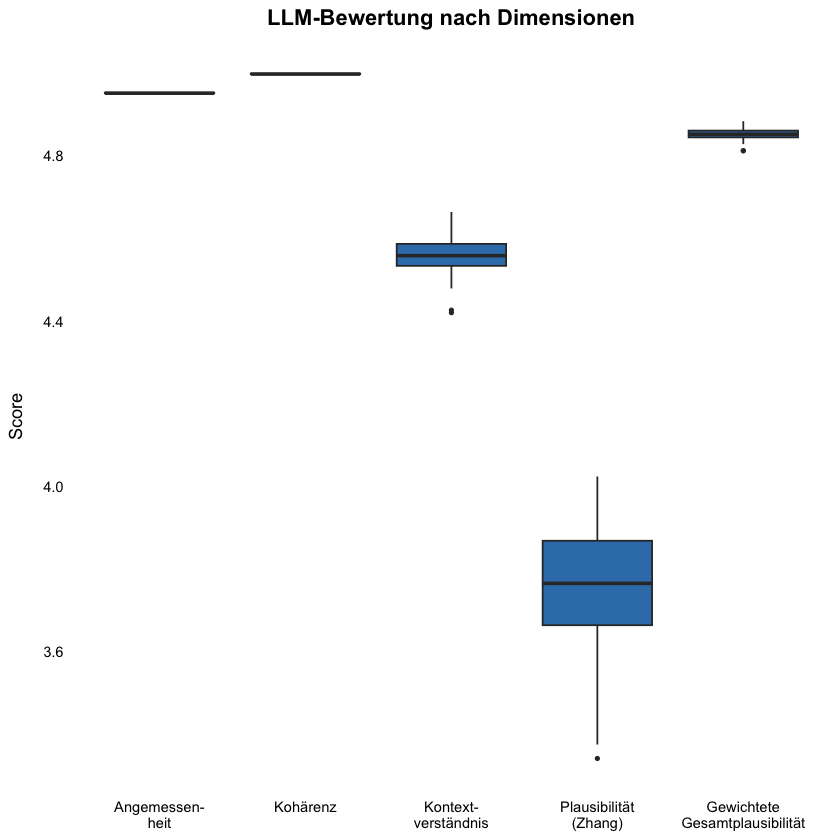

In [23]:
# Daten ins Long-Format transformieren (100 Werte pro Dimension + aggregierter Score)
df_long <- df_agg_per_episode %>%
  select(-Episode) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Dimension",
    values_to = "Score"
  ) %>%
  mutate(
    Dimension = factor(Dimension, levels = c(
      "Angemessenheit",
      "Kohärenz",
      "Kontextverständnis",
      "Plausibilität nach Zhang",
      "Aggregierter Score"
    ))
  )


# LaTeX-Pfad für tikzDevice setzen
options(tikzLatex = "/Library/TeX/texbin/pdflatex")


# TikZ-Export für Overleaf
tikz(file = "boxplot_llm_dim.tex", 
     width = 6, 
     height = 4,
     standAlone = FALSE)


# Plot erstellen
p <- ggplot(df_long, aes(x = Dimension, y = Score)) +
  geom_boxplot(fill = "#377eb8", outlier.size = 0.8) +
  labs(
    title = "LLM-Bewertung nach Dimensionen",
    x = NULL,
    y = "Score"
  ) +
  scale_x_discrete(
    labels = c(
      "Angemessen-\nheit",
      "Kohärenz",
      "Kontext-\nverständnis",
      "Plausibilität\n(Zhang)",
      "Gewichtete\nGesamtplausibilität"
    )
  ) +
  scale_y_continuous(
    n.breaks = 6,
    labels = scales::number_format(accuracy = 0.1)
  ) +
  theme_minimal(base_size = 11) +  # GEÄNDERT: von 14 auf 11
  theme(
    plot.title   = element_text(hjust = 0.5, face = "bold"),
    axis.text.x  = element_text(angle = 0, vjust = 1, hjust = 0.5),
    axis.title.y = element_text(margin = margin(r = 10)),
    axis.text    = element_text(color = "black"),
    panel.grid   = element_blank()
  )


print(p)  # Plot für TikZ ausgeben


dev.off()  # TikZ-Device schließen


# Dateigröße prüfen
cat("TikZ-Datei erstellt:", file.info("boxplot_llm_dim.tex")$size, "Bytes\n")


# Plot im Notebook anzeigen
p


# Violin-Plots für jedes Frage/Antwort-Paar

Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage1.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage2.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage3.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage4.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage5.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage6.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage7.tex


Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?tikzDevice for more information.”
Warning message in (function (texString, cex = 1, face = 1, engine = getOption("tikzDefaultEngine"), :
“Attempting to calculate the width of a Unicode stringusing the pdftex engine. This may fail! See the Unicodesection of ?ti

Erstellt: violinplot_llm_frage8.tex

Alle 8 Violin-Plots wurden erstellt.


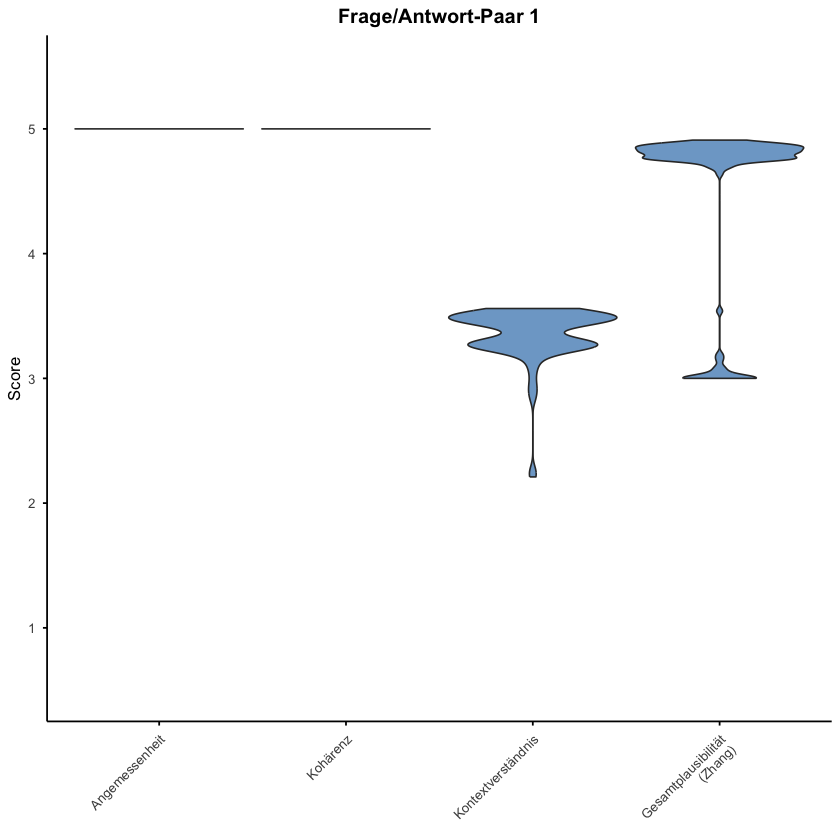

In [24]:
# Daten vorbereiten: Long-Format für Violin-Plots
df_violin <- df %>%
  select(Episode, Frage_Nr, 
         Angemessenheit_Score, 
         Kohärenz_Score, 
         Kontextverständnis_Score,
         Gesamtplausibilität_Score) %>%
  pivot_longer(
    cols = c(Angemessenheit_Score, Kohärenz_Score, 
             Kontextverständnis_Score, Gesamtplausibilität_Score),
    names_to = "Item",
    values_to = "Score"
  ) %>%
  mutate(
    Item = case_when(
      Item == "Angemessenheit_Score" ~ "Angemessenheit",
      Item == "Kohärenz_Score" ~ "Kohärenz",
      Item == "Kontextverständnis_Score" ~ "Kontextverständnis",
      Item == "Gesamtplausibilität_Score" ~ "Gesamtplausibilität\n(Zhang)",
      TRUE ~ Item
    ),
    Item = factor(Item, levels = c("Angemessenheit", "Kohärenz", "Kontextverständnis", 
                                   "Gesamtplausibilität\n(Zhang)"))
  )

# LaTeX-Pfad für tikzDevice setzen
options(tikzLatex = "/Library/TeX/texbin/pdflatex")

# Für jede Frage einen Violin-Plot erstellen
for (frage in 1:8) {
  # Daten für diese Frage filtern
  df_frage <- df_violin %>%
    filter(Frage_Nr == frage)
  
  # TikZ-Device öffnen
  tikz(file = paste0("violinplot_llm_frage", frage, ".tex"),
       width = 4.5,
       height = 3.2,
       standAlone = FALSE)
  
  # Violin-Plot erstellen
  p <- ggplot(df_frage, aes(x = Item, y = Score)) +
    geom_violin(fill = "#377eb8", alpha = 0.7, scale = "width") +
    labs(
      title = paste0("Frage/Antwort-Paar ", frage),
      x = NULL,
      y = "Score"
    ) +
    scale_y_continuous(breaks = 1:5, limits = c(0.5, 5.5)) +
    theme_minimal(base_size = 10) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold"),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.line = element_line(color = "black", linewidth = 0.5),
      axis.ticks = element_line(color = "black", linewidth = 0.5),
      panel.grid = element_blank()
    )
  
  print(p)
  dev.off()
  
  cat("Erstellt: violinplot_llm_frage", frage, ".tex\n", sep = "")
}

cat("\nAlle 8 Violin-Plots wurden erstellt.\n")

# Einen Beispiel-Plot auch direkt anzeigen
df_frage_example <- df_violin %>%
  filter(Frage_Nr == 1)

ggplot(df_frage_example, aes(x = Item, y = Score)) +
  geom_violin(fill = "#377eb8", alpha = 0.7, scale = "width") +
  labs(
    title = "Frage/Antwort-Paar 1",
    x = NULL,
    y = "Score"
  ) +
  scale_y_continuous(breaks = 1:5, limits = c(0.5, 5.5)) +
  theme_minimal(base_size = 10) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.line = element_line(color = "black", linewidth = 0.5),
    axis.ticks = element_line(color = "black", linewidth = 0.5),
    panel.grid = element_blank()
  )

# =====================================================================
# 2. Intra-Rater-Reliabilität – Kendall's W
# =====================================================================

In [25]:
# Aggregierten Score berechnen
df$Aggregierter_Score <- 0.3 * df$Kontextverständnis_Score +
                        0.4 * df$Kohärenz_Score +
                        0.3 * df$Angemessenheit_Score

# Kendall's W für alle Metriken berechnen
metriken <- c("Angemessenheit_Score", "Kohärenz_Score", "Kontextverständnis_Score",
              "Gesamtplausibilität_Score", "Aggregierter_Score")

kendall_w_values <- sapply(metriken, function(metric) {
  mat <- dcast(df, Frage_Nr ~ Episode, value.var = metric)
  kendall(mat[, -1])$value
})

# Chi-Quadrat und p-Werte
m <- 100
n <- 8
chi2_values <- m * (n - 1) * kendall_w_values
p_values <- 1 - pchisq(chi2_values, df = n - 1)

# Ergebnistabelle
results <- data.frame(
  Dimension = c("Angemessenheit", "Kohärenz", "Kontextverständnis",
                "Plausibilität nach Zhang", "Aggregierter Score"),
  W = round(kendall_w_values, 4),
  p_formatted = ifelse(p_values < 0.001, "< 0.001",
                       ifelse(p_values < 0.01, "< 0.01",
                              ifelse(p_values < 0.05, "< 0.05", 
                                     round(p_values, 3)))),
  Signifikanz = ifelse(p_values < 0.001, "***",
                       ifelse(p_values < 0.01, "**",
                              ifelse(p_values < 0.05, "*", "n.s.")))
)

kable(results, digits = 3,
      caption = "Intra-Rater-Reliabilität des LLM-Judges (Kendall's $W$).")



Table: Intra-Rater-Reliabilität des LLM-Judges (Kendall's $W$).

|                          |Dimension                |     W|p_formatted |Signifikanz |
|:-------------------------|:------------------------|-----:|:-----------|:-----------|
|Angemessenheit_Score      |Angemessenheit           | 0.333|< 0.001     |***         |
|Kohärenz_Score            |Kohärenz                 | 0.320|< 0.001     |***         |
|Kontextverständnis_Score  |Kontextverständnis       | 0.698|< 0.001     |***         |
|Gesamtplausibilität_Score |Plausibilität nach Zhang | 0.696|< 0.001     |***         |
|Aggregierter_Score        |Aggregierter Score       | 0.810|< 0.001     |***         |